In [1]:
import numpy as np
import matplotlib.pyplot as plt
import queue
import random

# Create Job

In [38]:
job_number  = 100

In [39]:
job_time_interval = np.random.poisson(5,job_number-1)
job_create_time = [sum(job_time_interval[:i]) for i in range(len(job_time_interval)+1)]
print(job_time_interval)
print(job_create_time)
print(len(job_create_time))

[ 3  4  4  5  2  4  5  3  8  6  5  5  5  2  4  5  3  2  6  6  6  4  6  1
  9 10  2  8  9  4  4  6  4  5  3  5  7  4  5  5  4  7  6  5  3  7  6  9
  6  5  7  5  3  5  2  7  6  6  4  6  6  7  3  1  6  4  4  2  2  7  6  4
  9  4  6  6  8  3  5  5  6  6  8  4  4  5  4  5  4  2  3  7  4  6  3  2
  3  8  6]
[0, 3, 7, 11, 16, 18, 22, 27, 30, 38, 44, 49, 54, 59, 61, 65, 70, 73, 75, 81, 87, 93, 97, 103, 104, 113, 123, 125, 133, 142, 146, 150, 156, 160, 165, 168, 173, 180, 184, 189, 194, 198, 205, 211, 216, 219, 226, 232, 241, 247, 252, 259, 264, 267, 272, 274, 281, 287, 293, 297, 303, 309, 316, 319, 320, 326, 330, 334, 336, 338, 345, 351, 355, 364, 368, 374, 380, 388, 391, 396, 401, 407, 413, 421, 425, 429, 434, 438, 443, 447, 449, 452, 459, 463, 469, 472, 474, 477, 485, 491]
100


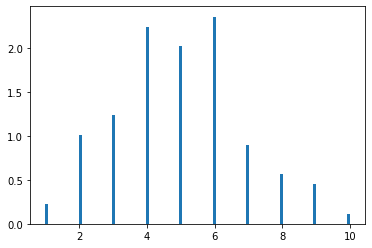

In [40]:
count, bins, ignored = plt.hist(job_time_interval, 100, density = True)
plt.show()

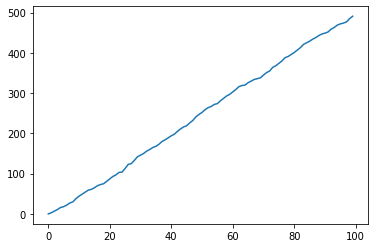

In [41]:
plt.plot(job_create_time)
plt.show()

# Job Queue

In [6]:
class JobQueue(object):
    
    def __init__(self):
        self.job_q = queue.Queue()
        self.job_number = 0
        
    def insertJob(self, inout,  station_dest):
        job = {"inout": inout, "station_dest": station_dest}
        self.job_q.put(job)
        self.job_number+=1

    def getJob(self):
        if self.job_q.empty():
            return 
        self.job_number-=1
        return self.job_q.get()

In [7]:
def job_create(rack_location,total_job_location_list,time,total_job_information):
    job_location = [random.choice(rack_location)]
    if total_job_location_list.count(job_location)%2==0:
        total_job_information['{}'.format(time)] = ['in',job_location]
    else:
        total_job_information['{}'.format(time)] = ['out',job_location]
    total_job_location_list.append(job_location)
    return total_job_information

In [8]:
# def job_create(rack_location,job_create_time,jobQ,total_job_location_list):
#     job_location = [random.choice(rack_location)]
#     if total_job_location_list.count(job_location)%2==0:
#         jobQ.insertJob("in",job_location)
#     else:
#         jobQ.insertJob("out",job_location)
#     total_job_location_list.append(job_location)
#     return jobQ

In [9]:
# ###version2
# ef job_create(rack_location,job_create_time,jobQ,total_job_location_list,time):
#     job_location = [random.choice(rack_location)]
#     total_job_information = {}
#     if total_job_location_list.count(job_location)%2==0:
#         jobQ.insertJob("in",job_location)
#         total_job_information['{}'.format(time)] = ['in',job_location]
#     else:
#         jobQ.insertJob("out",job_location)
#         total_job_information['{}'.format(time)] = ['out',job_location]
#     total_job_location_list.append(job_location)
#     return jobQ, total_job_information

# Auction

In [10]:
class Auction():
    def __init__(self,job,available_agv):
        self.job = job 
        self.available_agv = available_agv
        
    def choose_auctioneer(self,auction_agv_list):
        if len(auction_agv_list) == 0:
            self.auctioneer = random.choice(available_agv)
        
    def select_agv(self,bidding_list):
        self.bidding_list = bidding_list
        min_bid = min(biddling_list)
        target_agv = available_agv.index(min_bid)
        return target_agv
    

# AGV

In [11]:
class AGV(object):
    max_battery = 100
    CHARGING_STATION = [(2,9),(6,9)]    
    
    def __init__(self,agv_id,current_location,current_tick=0):
        self.agv_id = agv_id
        self.battery = self.max_battery
        self.current_location = current_location
        self.job = None
        self.destination = None
        self.available = True
        self.current_tick = current_tick
        self.to_chaging_station = False
        
#     def __str__(self):
#         return 'agv_id:{}  job:{}  available:{}'.format(self.agv_id, self.job, self.available)
    
    def __str__(self):
        return 'agv_id:{}'.format(self.agv_id)
    
    def move_one_tick(self):
        if len(self.path) !=0:
            self.next_location = self.path[0]
            self.current_location = self.next_location
            del self.path[0]
            if len(self.path) ==0:
                self.available = True
            self.battery -=1
            self.current_tick +=1
        else:
            self.available = True
    
    def get_job(self,job,astar_path):
        self.job = job
        self.path = astar_path
        self.available = False
    
    def calculate_cost(self,agv_id,job,warehouse,INPUT_STATION,OUTPUT_STATION):
        if job['inout']=='in':
            cost = len(astar(warehouse,agv.current_location,INPUT_STATION))
        else:
            cost = len(astar(warehouse,agv.current_location,Rack_enterence[job['station_dest']]))
        return cost        
    
        
    def agv_to_charging_station(self,battery_threshold):
        if self.available == True and self.battery <= battery_threshold:
            self.to_chaging_station = True

In [12]:
def getAvailAGV(AGV_LIST,battery_threshold):
    return [agv for agv in AGV_LIST if agv.available == True and agv.battery > battery_threshold]

In [13]:
def get_need_charge_agv(AGV_LIST,battery_threshold):
    return [agv for agv in AGV_LIST if agv.to_chaging_station == False and agv.battery <= battery_threshold]

In [14]:
# def agv_to_charging(self,battery_threshold):
#     if self.available = True and self.battery<=battery_threshold:

# Astar

In [15]:
class node:
    def __init__(self,parent=None, position = None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
    def __eq__(self,other):
        return self.position == other.position

In [16]:
def manhattan_distance(start_node,goal_node):
    dx = abs(start_node[0]-goal_node[0])
    dy = abs(start_node[1]-goal_node[1])
    return dx + dy

In [17]:
def astar(graph,start,goal):
    start_node = node(None,(start[1],start[0]))
    goal_node = node(None,(goal[1],goal[0]))
    open_list = []
    closed_list = []
    graph = [el for el in graph][::-1]
#     for i in graph:
#         print(i)
    
    open_list.append(start_node)
    while open_list:
        current_node = open_list[0]
        current_index = 0
        
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        if current_node == goal_node:
            path = []
            current = current_node
            while current is not None:
                x,y = current.position
                graph[x][y] = 9
                path.append((current.position[1],current.position[0]))
                current = current.parent
                
            return path[::-1]
        
        children = []
        for new_position in [(0,1),(1,0),(-1,0),(0,-1)]:
            node_position = (current_node.position[0]+new_position[0],
                             current_node.position[1]+new_position[1])
            within_range = [
                node_position[1]>len(graph)-1,
                node_position[1]<0,
                node_position[0]>len(graph[len(graph)-1])-1,
                node_position[0]<0]
            if any(within_range):
                continue
            if graph[node_position[0]][node_position[1]] !=0:
                continue
            
            new_node = node(current_node, node_position)
            children.append(new_node)
        
        for child in children:
            if child in closed_list:
                continue
            child.g = current_node.g+1
            child.h = manhattan_distance(child.position,goal_node.position)
            child.f = child.g + child.h
            
            if len([open_node for open_node in open_list
                   if child == open_node and child.g>open_node.g]) > 0:
                continue
            open_list.append(child)
            

# Charging station

In [18]:
# class Charging_station(object):
#     CHARGING_STATION = [(2,9),(6,9)]
    
#     def __init__(self,agv_id,current_location,current_tick=0):
#         self.CHARGING_STATION_availbale = True
#         self.battery = self.max_battery
#         self.current_location = current_location
#         self.job = None
#         self.destination = None
#         self.available = True
#         self.current_tick = current_tick
        
#     def charging_station_notavailble():
        

# Warehouse, Rack, Charging_station

In [19]:
def make_warehouse(row,col):
    warehouse = [[0]*col for i in range(row)]
    return warehouse 

In [20]:
def set_rack(warehouse,rack_location):
    for idx, row in enumerate(warehouse):
        warehouse[idx] =  [1 if (ix, ROW -1 - idx) in rack_location else 0 for ix,col in enumerate(warehouse[idx])]

In [21]:
def get4Ways(point):
    return [(point[0],point[1]+1), (point[0]+1,point[1]),
            (point[0],point[1]-1), (point[0]-1,point[1])]

In [22]:
def set_charging_station(warehouse,CHARGING_STATION,ROW,COL):
    for charging_spot in CHARGING_STATION:
        warehouse[ROW-1-charging_spot[1]][charging_spot[0]]=2
    return warehouse

## Make Warehouse, Rack, Rack enterence, Station

In [33]:
ROW, COL = 10,10
warehouse = make_warehouse(ROW,COL)
INPUT_STATION = (3,0)
OUTPUT_STATION = (6,0)
CHARGING_STATION = [(2,9),(7,9)]   
rack_location =  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
                  (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), 
                  (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), 
                  (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), 
                  (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), 
                  (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)]


In [34]:
set_rack(warehouse,rack_location)
set_charging_station(warehouse,CHARGING_STATION,ROW,COL)

[[0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [35]:
warehouse

[[0, 0, 2, 0, 0, 0, 0, 2, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [36]:
print(astar(warehouse,agv1.current_location,OUTPUT_STATION))

[(0, 9), (1, 9), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (6, 7), (6, 6), (6, 5), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0)]


In [37]:
warehouse

[[9, 9, 2, 0, 0, 0, 0, 2, 0, 0],
 [0, 9, 9, 9, 9, 9, 9, 0, 0, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 9, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 9, 0, 0, 0]]

In [25]:
Rack_enterence={}
for point in rack_location:
    four_ways = get4Ways(point)
    neighbour_obstacle_list = [way for way in four_ways if way in rack_location]  ## 좌표정보 ex) (1,3), (2,2)....
    neighbour_empty_list = [way for way in four_ways if way not in rack_location] 
    if len(neighbour_empty_list) == 1: ### 모서리 아님
        Rack_enterence[point] = neighbour_empty_list[0]
    elif len(neighbour_empty_list) == 2: ### 모서리임
        obstacle_way_list = [four_ways.index(obst) for obst in neighbour_obstacle_list]  ## 방향정보 ex) 0,1, 2...
        for idx, obst_point in enumerate(neighbour_obstacle_list):
            obst_way = obstacle_way_list[idx]
            obst_plus1_point = get4Ways(obst_point)[obst_way]
            if obst_plus1_point in rack_location:
                continue
            else:
                Rack_enterence[point] = four_ways[obst_way-2]
    else:
        print('ERROR finding obstacle/entrance for RACK {}'.format(point))

# 실험

#### Main 함수

In [26]:
print(job_create_time)

[0, 6, 16, 20, 22, 29, 36, 40, 45, 49, 50, 54, 60, 67, 72, 73, 78, 81, 83, 85, 88, 93, 98, 102, 110, 116, 121, 124, 130, 132, 132, 135, 140, 141, 145, 146, 150, 157, 158, 164, 169, 171, 174, 177, 181, 187, 191, 194, 197, 205, 213, 221, 226, 230, 240, 243, 248, 256, 262, 267, 270, 276, 277, 283, 289, 296, 299, 302, 306, 309, 315, 317, 323, 330, 336, 342, 346, 349, 351, 356, 362, 367, 372, 378, 384, 392, 396, 401, 409, 413, 415, 420, 425, 430, 433, 435, 440, 446, 452, 457]


### Create agv

In [27]:
agv1 = AGV("agv1",(0,9))
agv2 = AGV("agv2",(3,9))
agv3 = AGV("agv3",(6,9))
agv4 = AGV("agv4",(9,9))
AGV_LIST = [agv1,agv2,agv3,agv4]
AGV_LIST

### Simulation condition

In [28]:
jobQ = JobQueue()
jobQ_for_simulation = JobQueue()
run_time = 500
total_job_location_list = []
select_agv = []
battery_threshold = 20
total_job_information = {}

### Job_create

In [29]:
for time in range(run_time+1):
    if time in job_create_time:
        job_create(rack_location,total_job_location_list,time,total_job_information)
print(total_job_information)

{'0': ['in', [(7, 3)]], '6': ['in', [(4, 3)]], '16': ['in', [(2, 6)]], '20': ['in', [(1, 6)]], '22': ['in', [(5, 6)]], '29': ['in', [(1, 2)]], '36': ['in', [(2, 4)]], '40': ['out', [(7, 3)]], '45': ['out', [(1, 6)]], '49': ['in', [(1, 4)]], '50': ['in', [(7, 5)]], '54': ['in', [(5, 3)]], '60': ['out', [(2, 4)]], '67': ['out', [(2, 6)]], '72': ['in', [(1, 1)]], '73': ['in', [(5, 1)]], '78': ['in', [(7, 3)]], '81': ['in', [(4, 5)]], '83': ['in', [(2, 6)]], '85': ['in', [(2, 3)]], '88': ['in', [(1, 3)]], '93': ['in', [(4, 1)]], '98': ['out', [(1, 1)]], '102': ['out', [(1, 4)]], '110': ['out', [(2, 6)]], '116': ['in', [(2, 5)]], '121': ['in', [(8, 4)]], '124': ['out', [(5, 3)]], '130': ['in', [(1, 4)]], '132': ['in', [(4, 6)]], '135': ['out', [(4, 1)]], '140': ['in', [(1, 1)]], '141': ['in', [(7, 7)]], '145': ['out', [(2, 3)]], '146': ['out', [(5, 6)]], '150': ['in', [(4, 4)]], '157': ['out', [(1, 1)]], '158': ['out', [(1, 2)]], '164': ['in', [(5, 3)]], '169': ['out', [(7, 5)]], '171': ['i

In [30]:
for running_time in range(run_time+1):
    if running_time in job_create_time:
        jobQ.insertJob(total_job_information.get('{}'.format(running_time))[0],total_job_information.get('{}'.format(running_time))[1][0])
        agv_avail = getAvailAGV(AGV_LIST,battery_threshold)
        print(agv_avail)
        #사용가능한 agv와 job이 있을때 
        if len(agv_avail)!=0 and jobQ.job_number !=0:
            if running_time ==0:
                auctioneer = random.choice(agv_avail)
            else:
                auctioneer = select_agv[-1]
            job = jobQ.getJob()
            bid_list = []
            for agv in agv_avail:
                bid_list.append(agv.calculate_cost(agv,job,warehouse,INPUT_STATION,OUTPUT_STATION))
            min_bid = min(bid_list)
            target_agv = agv_avail[bid_list.index(min_bid)]
            if job['inout']=='in':
                astar_path = astar(warehouse,target_agv.current_location,INPUT_STATION)+astar(warehouse,INPUT_STATION,Rack_enterence[job['station_dest']])
            else:
                astar_path = astar(warehouse,target_agv.current_location,Rack_enterence[job['station_dest']])+astar(warehouse,Rack_enterence[job['station_dest']],OUTPUT_STATION)
            target_agv.get_job(job,astar_path)
            select_agv.append(target_agv)
            print("target_agv : {}, target_agv.battery: {} ,astar_path : {}, available:{}".format(target_agv,target_agv.battery,astar_path,target_agv.available))
    #           print(auctioneer)
            for moving_agv in select_agv:
                moving_agv.move_one_tick()
                print("@@",moving_agv,moving_agv.battery,moving_agv.current_location)
                    
    else:
        for moving_agvs in select_agv:
            moving_agvs.move_one_tick()
            print("moving agvs {} , agv battery : {}, moving agv location{}, agv available {}".format(moving_agvs, moving_agvs.battery,moving_agvs.current_location, moving_agvs.available))
#             if len(moving_agvs.path) ==1:
#                 del select_agv[select_agv.index(moving_agvs)]
#             print("@@@@",moving_agvs,moving_agv.battery,moving_agv.current_location)
        

[<__main__.AGV object at 0x000001B26D004A88>, <__main__.AGV object at 0x000001B26D004EC8>, <__main__.AGV object at 0x000001B26D004508>, <__main__.AGV object at 0x000001B26D004E48>]


TypeError: object of type 'NoneType' has no len()

In [ ]:
for running_time in range(run_time+1):
    if running_time in job_create_time:
        jobQ.insertJob(total_job_information.get('{}'.format(running_time))[0],total_job_information.get('{}'.format(running_time))[1][0])
        agv_avail = getAvailAGV(AGV_LIST,battery_threshold)
        need_charage_agv = 
#         print(agv_avail)
        #사용가능한 agv와 job이 있을때 
        if len(agv_avail)!=0 and jobQ.job_number !=0:
            if running_time ==0:
                auctioneer = random.choice(agv_avail)
            else:
                auctioneer = select_agv[-1]
            job = jobQ.getJob()
            bid_list = []
            for agv in agv_avail:
                bid_list.append(agv.calculate_cost(agv,job,warehouse,INPUT_STATION,OUTPUT_STATION))
            min_bid = min(bid_list)
            target_agv = agv_avail[bid_list.index(min_bid)]
            if job['inout']=='in':
                astar_path = astar(warehouse,target_agv.current_location,INPUT_STATION)+astar(warehouse,INPUT_STATION,Rack_enterence[job['station_dest']])
            else:
                astar_path = astar(warehouse,target_agv.current_location,Rack_enterence[job['station_dest']])+astar(warehouse,Rack_enterence[job['station_dest']],OUTPUT_STATION)
            target_agv.get_job(job,astar_path)
            select_agv.append(target_agv)
            print("target_agv : {}, target_agv.battery: {} ,astar_path : {}, available:{}".format(target_agv,target_agv.battery,astar_path,target_agv.available))
    #           print(auctioneer)
            for moving_agv in select_agv:
                moving_agv.move_one_tick()
                print("@@",moving_agv,moving_agv.battery,moving_agv.current_location)
            
                
#         elif len(agv_avail) == 0 and jobQ.job_number = 0  # move one tick 
#         elif len(agv_avail) == 0 and jobQ.job_number !=0  # move one tick 
#         elif len(agv_avail) !=0 and jobQ.job_number = 0   # move one tick 
                    
    else:
        for moving_agvs in select_agv:
            moving_agvs.move_one_tick()
            print("moving agvs{} , moving agv location{}, agv battery{}, agv available{}".format(moving_agvs, moving_agvs.current_location, moving_agvs.battery, moving_agvs.available))
#             if len(moving_agvs.path) ==1:
#                 del select_agv[select_agv.index(moving_agvs)]
#             print("@@@@",moving_agvs,moving_agv.battery,moving_agv.current_location)
        

In [ ]:
# for time in range(run_time+1):
#     if time in job_create_time:
#         job_create(rack_location,job_create_time,jobQ,total_job_location_list)
#         agv_avail = getAvailAGV(AGV_LIST,battery_threshold)
#         print(agv_avail)
#         if len(agv_avail)!=0 and jobQ.job_number !=0:
#             if time ==0:
#                 auctioneer = random.choice(agv_avail)
#             else:
#                 auctioneer = select_agv[-1]
#             job = jobQ.getJob()
#             print(job)
#             bid_list = []
#             for agv in agv_avail:
#                 bid_list.append(agv.calculate_cost(agv,job,warehouse,INPUT_STATION,OUTPUT_STATION))
#             min_bid = min(bid_list)
#             target_agv = agv_avail[bid_list.index(min_bid)]
#             if job['inout']=='in':
#                 astar_path = astar(warehouse,target_agv.current_location,INPUT_STATION)+astar(warehouse,INPUT_STATION,Rack_enterence[job['station_dest'][0]])
#             else:
#                 astar_path = astar(warehouse,target_agv.current_location,Rack_enterence[job['station_dest'][0]])+astar(warehouse,Rack_enterence[job['station_dest'][0]],OUTPUT_STATION)
#             target_agv.get_job(job,astar_path)
#             select_agv.append(target_agv)
#             print("target_agv : {}, target_agv.battery: {} ,astar_path : {}, available:{}".format(target_agv,target_agv.battery,astar_path,target_agv.available))
# #             print(auctioneer)
#             for moving_agv in select_agv:
#                 moving_agv.move_one_tick()
#                 print("@@",moving_agv,moving_agv.battery,moving_agv.current_location)
#     else:
#         for moving_agvs in select_agv:
#             moving_agvs.move_one_tick()
#             print("moving agvs : {} ,agv battery : {} ,moving agv location{} , agv available : {}".format(moving_agvs, moving_agvs.battery,moving_agvs.current_location, moving_agvs.available))
# #             if len(moving_agvs.path) ==1:
# #                 del select_agv[select_agv.index(moving_agvs)]
# #             print("@@@@",moving_agvs,moving_agv.battery,moving_agv.current_location)

In [ ]:
# ### job이 알려지지 않은 채로 생성될 때 
# for time in range(run_time+1):
#     if time in job_create_time:
#         job_create(rack_location,job_create_time,jobQ,total_job_location_list)
#         agv_avail = getAvailAGV(AGV_LIST,battery_threshold)
#         print(agv_avail)
#         if len(agv_avail)!=0 and jobQ.job_number !=0:
#             if time ==0:
#                 auctioneer = random.choice(agv_avail)
#             else:
#                 auctioneer = select_agv[-1]
#             job = jobQ.getJob()
#             print(job)
#             bid_list = []
#             for agv in agv_avail:
#                 bid_list.append(agv.calculate_cost(agv,job,warehouse,INPUT_STATION,OUTPUT_STATION))
#             min_bid = min(bid_list)
#             target_agv = agv_avail[bid_list.index(min_bid)]
#             if job['inout']=='in':
#                 astar_path = astar(warehouse,target_agv.current_location,INPUT_STATION)+astar(warehouse,INPUT_STATION,Rack_enterence[job['station_dest'][0]])
#             else:
#                 astar_path = astar(warehouse,target_agv.current_location,Rack_enterence[job['station_dest'][0]])+astar(warehouse,Rack_enterence[job['station_dest'][0]],OUTPUT_STATION)
#             target_agv.get_job(job,astar_path)
#             select_agv.append(target_agv)
#             print("target_agv : {}, target_agv.battery: {} ,astar_path : {}, available:{}".format(target_agv,target_agv.battery,astar_path,target_agv.available))
# #             print(auctioneer)
#             for moving_agv in select_agv:
#                 moving_agv.move_one_tick()
#                 print("@@",moving_agv,moving_agv.battery,moving_agv.current_location)
#     else:
#         for moving_agvs in select_agv:
#             moving_agvs.move_one_tick()
#             print("moving agvs : {} ,agv battery : {} ,moving agv location{} , agv available : {}".format(moving_agvs, moving_agvs.battery,moving_agvs.current_location, moving_agvs.available))
# #             if len(moving_agvs.path) ==1:
# #                 del select_agv[select_agv.index(moving_agvs)]
# #             print("@@@@",moving_agvs,moving_agv.battery,moving_agv.current_location)
        